In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import rna_utils as ru

CORR200_PATH = "../data/seqsim_filtered200.h5"
CORR400_PATH = "../data/seqsim_filtered400.h5"
META_PATH = "../data/sources/ArchiveII_with_prob_and_motiv.csv"

In [79]:
meta = pd.read_csv(META_PATH)
corr200, meta200 = ru.load_and_align(corr_path=CORR200_PATH, meta_path=META_PATH)
corr400, meta400 = ru.load_and_align(corr_path=CORR400_PATH, meta_path=META_PATH)

In [80]:
meta200 = meta.query("id in @corr200.index")
meta200.reset_index(inplace=True)
meta400 = meta.query("id in @corr400.index")
meta400.reset_index(inplace=True)

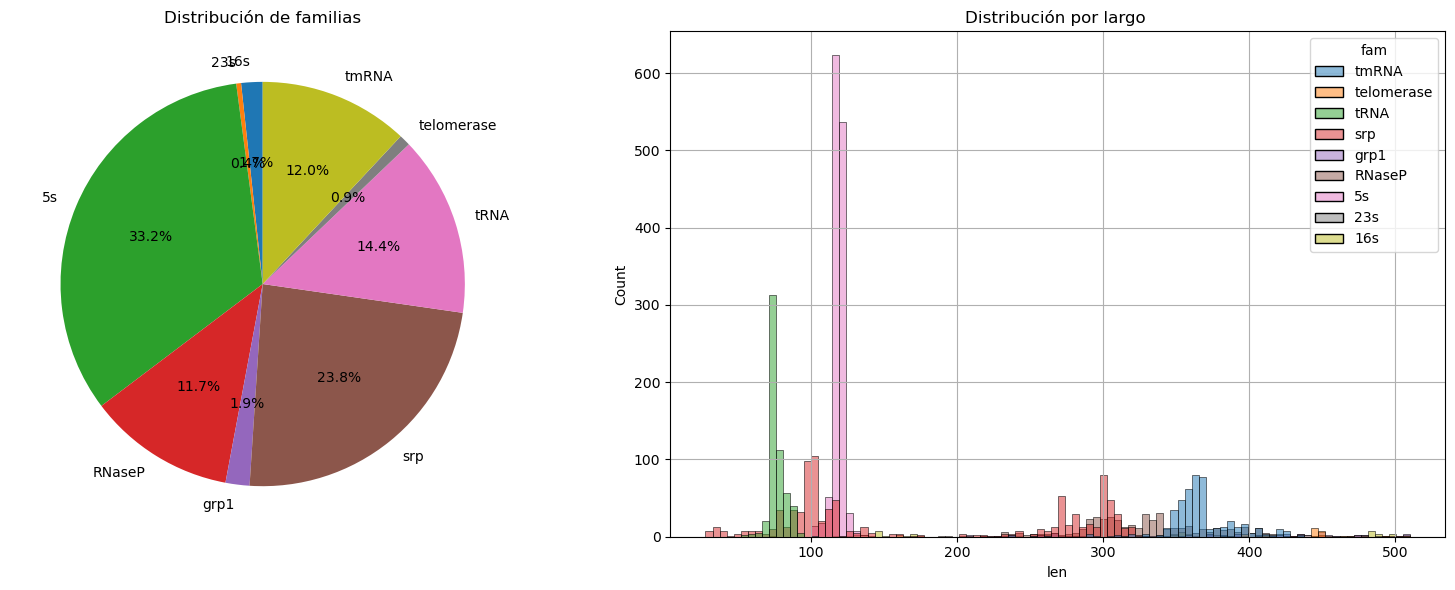

In [81]:
meta.reset_index(inplace=True)
count0 = meta.groupby("fam")["id"].agg("count").reset_index()
count0.sort_values("fam", ascending=False)
# Configurar la figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de torta
axes[0].pie(count0["id"], labels=count0["fam"], autopct="%1.1f%%", startangle=90)
axes[0].set_title("Distribución de familias")

# Histograma con Seaborn
sns.histplot(
    data=meta.sort_values("fam", ascending=False),
    x="len",
    hue="fam",
    bins=100,
    ax=axes[1],
)
axes[1].set_title("Distribución por largo ")
axes[1].grid()
plt.tight_layout()
plt.show()

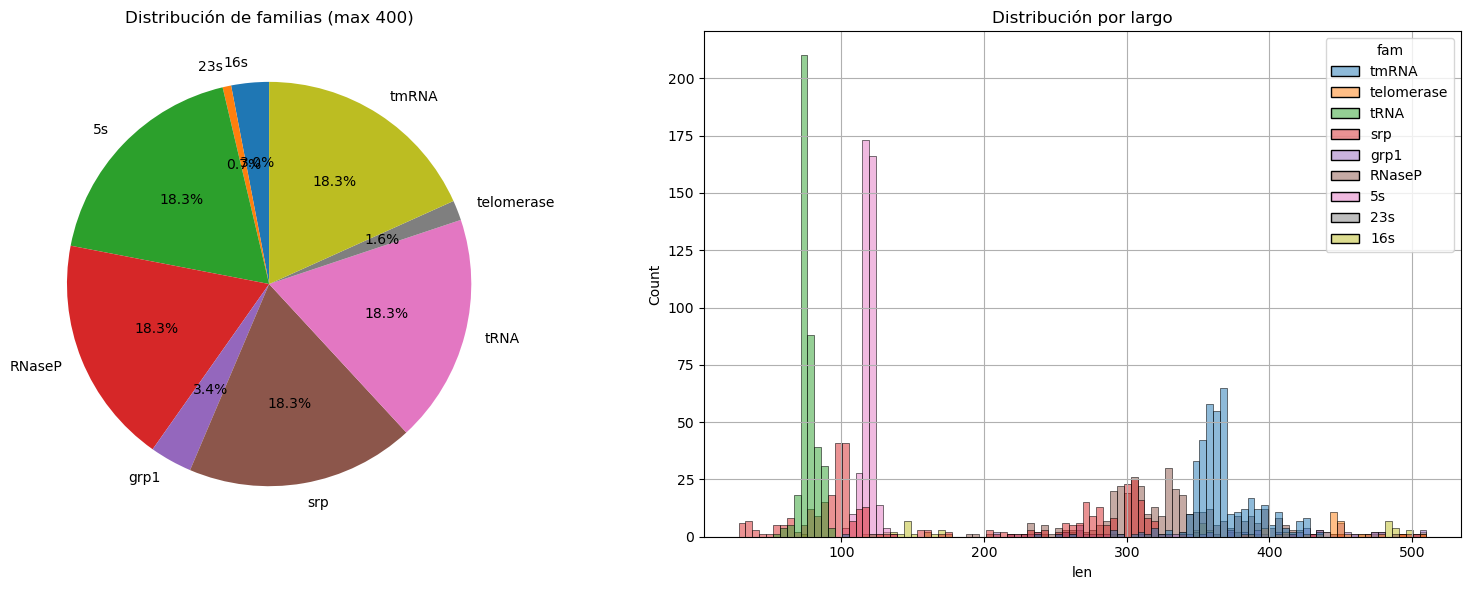

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

count0 = meta400.groupby("fam")["id"].agg("count").reset_index()
count0.sort_values("fam", ascending=False)
# Configurar la figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de torta
axes[0].pie(count0["id"], labels=count0["fam"], autopct="%1.1f%%", startangle=90)
axes[0].set_title("Distribución de familias (max 400)")

# Histograma con Seaborn
sns.histplot(
    data=meta400.sort_values("fam", ascending=False),
    x="len",
    hue="fam",
    bins=100,
    ax=axes[1],
)
axes[1].set_title("Distribución por largo")
axes[1].grid()
plt.tight_layout()
plt.show()

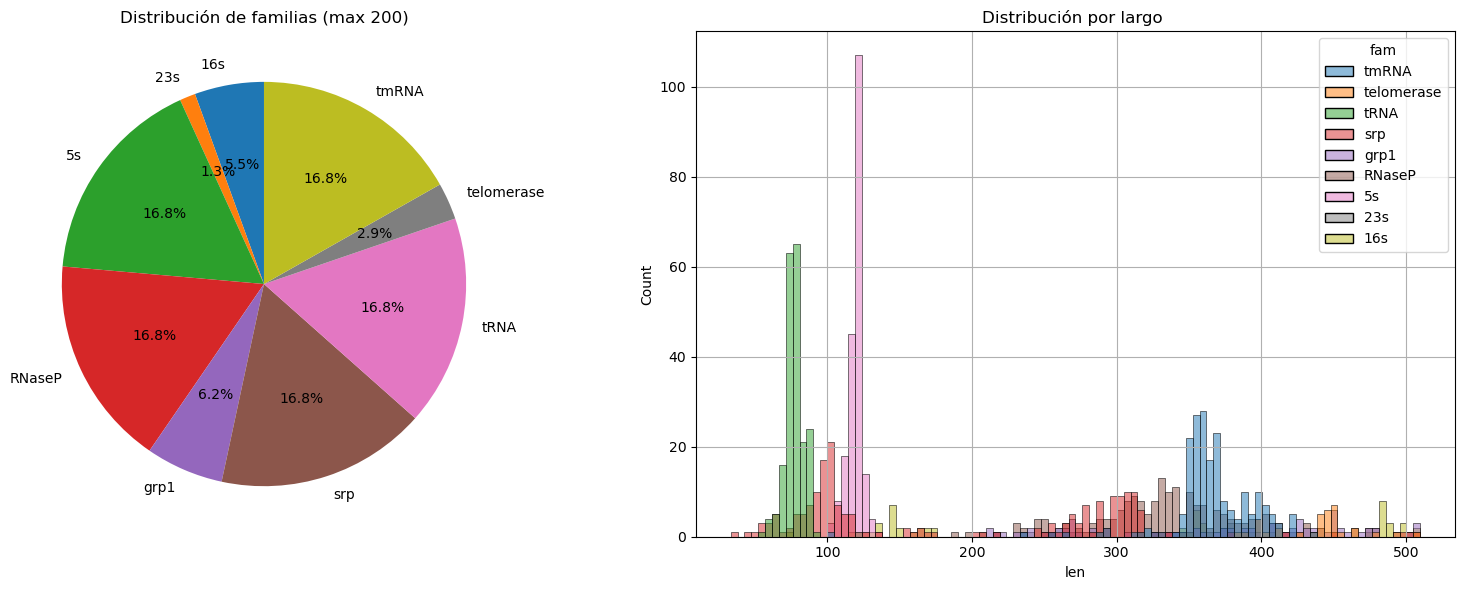

In [83]:
count0 = meta200.groupby("fam")["id"].agg("count").reset_index()
count0.sort_values("fam", ascending=False)
# Configurar la figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de torta
axes[0].pie(count0["id"], labels=count0["fam"], autopct="%1.1f%%", startangle=90)
axes[0].set_title("Distribución de familias (max 200)")

# Histograma con Seaborn
sns.histplot(
    data=meta200.sort_values("fam", ascending=False),
    x="len",
    hue="fam",
    bins=100,
    ax=axes[1],
)
axes[1].set_title("Distribución por largo ")
axes[1].grid()
plt.tight_layout()
plt.show()

In [84]:
meta.shape

(3864, 10)

In [85]:
dfs400 = {}
for fam in meta400["fam"].unique():
    dfs400[fam] = meta400.query("fam == @fam")

for fam, df in dfs400.items():
    print(
        fam,
        "|sequences:",
        df.shape[0],
        "| size (1-fam): %",
        round((meta400.shape[0] - df.shape[0]) / meta400.shape[0] * 100, 2),
    )

tmRNA |sequences: 400 | size (1-fam): % 81.74
tRNA |sequences: 400 | size (1-fam): % 81.74
srp |sequences: 400 | size (1-fam): % 81.74
5s |sequences: 400 | size (1-fam): % 81.74
grp1 |sequences: 74 | size (1-fam): % 96.62
RNaseP |sequences: 400 | size (1-fam): % 81.74
23s |sequences: 15 | size (1-fam): % 99.32
telomerase |sequences: 35 | size (1-fam): % 98.4
16s |sequences: 66 | size (1-fam): % 96.99


In [86]:
dfs200 = {}
for fam in meta400["fam"].unique():
    dfs200[fam] = meta200.query("fam == @fam")

for fam, df in dfs200.items():
    print(
        fam,
        "|sequences:",
        df.shape[0],
        "| size (1-fam): %",
        round((meta200.shape[0] - df.shape[0]) / meta200.shape[0] * 100, 2),
    )

tmRNA |sequences: 200 | size (1-fam): % 83.19
tRNA |sequences: 200 | size (1-fam): % 83.19
srp |sequences: 200 | size (1-fam): % 83.19
5s |sequences: 200 | size (1-fam): % 83.19
grp1 |sequences: 74 | size (1-fam): % 93.78
RNaseP |sequences: 200 | size (1-fam): % 83.19
23s |sequences: 15 | size (1-fam): % 98.74
telomerase |sequences: 35 | size (1-fam): % 97.06
16s |sequences: 66 | size (1-fam): % 94.45
